# L3-Mathématiques - Analyse Numérique S1 (LU3MA232)
# TP1: Résolution d'EDO par la méthode d'Euler

## I) Rappels de Python sur un cas d'étude

### Introduction
Dans cet exercice nous allons étudier la charge d'un condensateur dans un circuit RC. Le circuit RC est composé d'un générateur (de tension E), d'une résistance (de résistance R) et d'un condensateur (de capacitance C) tous reliés en série. 

La physique nous permet d'établir le système suivant sur la tension du condensateur au cours du temps:
$$
\begin{cases}
\tau U'(t) + U(t) = E\\
U(0) = U_0
\end{cases},
$$
avec $\tau = RC$ (la constante de temps).

### Question 1: Définir une fonction
Il est facile de montrer (vous pouvez le faire) que la solution de ce problème de Cauchy pour $U_0=0$ est:
$$U(t)=E(1-e^{-\frac{t}{\tau}}).$$


Le premier exercice consiste à définir une fonction "tension" qui nous renvoie à un instant t la tension au bornes du condensateur.

1) Définissez et testez la fonction $U(t)$. 

2) Evaluez-la pour différentes valeurs de $\tau$, E et d'un temps t:

In [1]:
#On commence par appeler les librairies qui nous seront utiles
#Ces librairies (bien connues en Python) contiennent diverses fonctions qui nous evitent de reinventer la roue...
import numpy as np #sert entre autre a manipuler des vecteurs

def tension(tau, E, temps):
    U = E*(1.-np.exp(-temps/tau))
    return U

# Declaration des constantes physiques
R = 47000 #[Ohm]
C = 0.01 #[F]
E = 5 #[V]
tau = R*C

U0 = tension(tau, E, 0.)# Evaluation de la tension pour un jeu de parametres
U10 = tension(tau, E, 10.)# Evaluation de la tension pour un autre jeu de parametres

# Affichage des resultats
print('A t = 0s, U = ', U0, 'V')
print('A t = 10s, U = ', U10, 'V')


A t = 0s, U =  0.0 V
A t = 10s, U =  0.10525922887515082 V


### Question 2: Tracer des courbes
Plusieurs étapes sont nécessaires pour tracer une courbe:

- Définir l'intervalle $[0,100]$ sur lequel on veut calculer la fonction.

- Choisir une discrétisation (par exemple selon une des méthodes de la Question 2.

- Evaluer la fonction aux différents temps de discrétisation.

- Afficher la ligne brisée des points $(t_i, y(t_i))_{i=0,\ldots,N}$.

- Ajouter de l'information au graphique pour faciliter la lecture (ex: légende, nom aux axes,...).

***Remarque:*** Notez que plus la discrétisation est fine plus la courbe est lisse (aspect "continu"). En revanche en pratique, une discrétisation trop fine pourra induire des temps de calculs très longs.

Tracez sur le même graphique $U(t), t\in[0,100]$ pour différentes valeurs de $\tau$ et E. On pourra par exemple créer un tableau $\tau = [\tau_0, \ldots, \tau_n]$ et $E = [E_0, \ldots E_m]$ contenant les différents couples de valeurs de $\tau$ et E à évaluer.

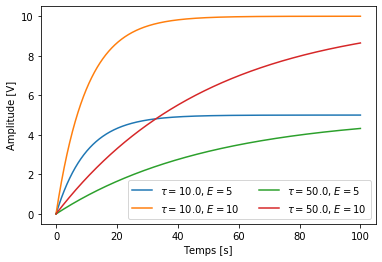

In [5]:
import matplotlib.pyplot as plt

temps = np.linspace(0., 100., 1000)# discretisation de notre intervalle de temps

tau = np.array([10.0, 50.0])# [s] 2 valeurs tests pour tau
E = np.array([5, 10])# [V] 2 valeurs tests pour E


fig = plt.figure()# Creation de la figure
ax = fig.add_subplot(111)# Ajout d un graphique a la figure

for itau in tau:# On parcourt les differentes valeurs de tau
    for iE in E:# On parcourt les differentes valeurs de E
        U_ = tension(itau, iE, temps)# On evalue la tension
        ax.plot(temps, U_, label=r'$\tau=$'+str(itau)+', $E=$'+str(iE))# On ajoute le trace au graphique
ax.legend(ncol=2)# Ajout de la legende

# Ajout du nom des axes
ax.set_xlabel('Temps [s]')
ax.set_ylabel('Amplitude [V]')

plt.show()

### Question 3: Calculer une solution approchée d'une EDO
On se propose de résoudre numériquement l'EDO par la méthode "Euler explicite" (vue en TD):
$$
y_{i+1} = y_i + (t_{i+1}-t_i)f(t_i, y_i), \quad i\in [0, n-1].
$$

où, ici, $n$ correspond à la taille du tableau discrétisé du temps.

Dans le cas de notre application, nous avons:

$$
U_{i+1} = U_i + (t_{i+1}-t_i)f(t_i, U_i).
$$

En reprenant l'EDO définie en tout début d'exercice, on peut montrer que:

$$
f(t_i, U_i) = \frac{E-U_i}{\tau}.
$$

1) Ecrivez la fonction qui prend en paramètres la condition initiale ($U_0=0$), $\tau$, E ainsi que le vecteur temps discrétisé et qui retourne la solution approchée de l'EDO aux différents temps.

In [6]:
def EulerExp_U(u_0, tau, E, temps):
    u_ = np.zeros(len(temps))# Initialisation du vecteur tension
    u_[0] = u_0# Affectation de la condition initiale (remarquez que si u_0=0, cette ligne est inutile)
    
    for nt in range(len(temps)-1):
        idt = temps[nt+1]-temps[nt]# Pas de temps
        u_[nt+1] = u_[nt]+idt*((E-u_[nt])/tau)
    return u_

2) Déclarez un tableau contenant le temps discrétisé.

3) Evaluez la solution exacte sur votre temps discrétisé (vous pouvez utiliser la fonction que vous avez définie à la question 1).

4) Evaluez la solution approchée sur votre temps discrétisé.

5) Comparez les résultats obtenus sur une figure.

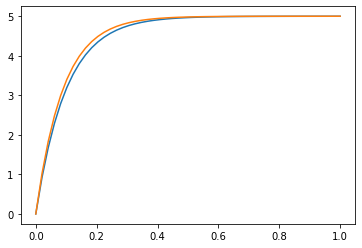

In [7]:
tau = 0.1
E = 5.

temps = np.linspace(0., 1., 50)

u_exacte = tension(tau, E, temps)
u_approchee = EulerExp_U(0., tau, E, temps)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(temps, u_exacte)
ax.plot(temps, u_approchee)

6) Vous pouvez réitérer le processus en augmentant ou diminuant la taille de votre tableau de temps discrétisé (en changeant le pas de discrétisation ou le nombre de points désirés). Qu'observez-vous?

### Question 4: Retrouver l'ordre de la méthode Euleur explicite
La schéma Euler explicite est connu pour être une méthode d'ordre 1. Nous allons le vérifier numériquement.
<br/> Déclarer un tableau contenant différents pas de discrétisation (ordonné dans l'ordre croissant). Par exemple de $0.01$ à $0.1$ avec un facteur $2$ entre chaque pas de temps.
<br/> Pour chaque pas de temps:

1) Créez le tableau de temps discrétisé.

2) Evaluez la solution exacte et approchée de l'EDO.

3) Calculez l'erreur et stockez-la dans un tableau.

On rappelle que l'erreur est:
        $$
            e = max_i(|u_{exacte}(t_i)-u_{approchee}(t_i)|).
        $$

4) Affichez l'erreur en fonction du pas de temps avec une échelle logarithmique.
<br/> Cela vient du fait que: $e = Ch^p$. En passant en échelle logarithmique, on va retrouver p comme étant la valeur de la pente!
<br/>Pour l'échelle logarithmique, on pourra utiliser loglog() au lieu de plot().

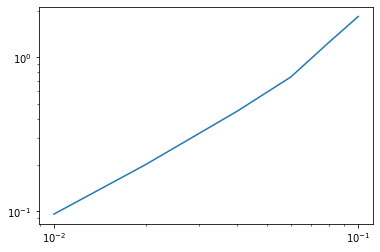

In [9]:
steps = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]

err = []

for istep in steps:
    
    temps = np.arange(0., 1., istep)
    
    u_exacte = tension(0.1, 5., temps)
    u_app = EulerExp_U(0., 0.1, 5., temps)
    
    ierr = np.max(np.abs(u_exacte-u_app))
    err.append(ierr)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(steps, err)

#Pourquoi on passe en echelle log :
#Si erreur = C h^p alors
#log (erreur )  = log(C h^p ) = p *log(C h) = p log (C) + p log(h)
#Donc si on note y = log (erreur) et x=log(h), on a bien
#y= Cst + p *x
#Donc l'ordre de la méthode est le coéfficient directeur de la droite de la courbe log log entre l'erreur et le pas de temps

Afin d'approximer la pente de cette courbe, on peut utiliser la fonction polyfit() de numpy. Cette fonction permet d'approcher un ensemble de points par un polynôme de degré m en retournant ses coefficients polynomiaux.

5) A partir de la documentation numpy de la fonction polyfit(), quelle pente obtenez-vous?

In [11]:
print(np.polyfit(np.log(steps), np.log(err), 1))

[1.2626517 3.3746418]


## II) Vitesse d'un corps, méthode implicite vs explicite

### Introduction

Nous nous penchons à présent sur un problème bien connu de la mécanique newtonienne : la chute d'un corps de masse m sous l'effet d'un potentiel gravitationnel g(t). Si la chute se produit dans l'air ambiant, on pourra négliger la poussée d'Archimède, mais pas la force de frottement liée à la vitesse v du corps. On suppose que les forces de frottements peuvent se mettre sous la forme : $f = - \alpha v$, s'opposant ainsi au mouvement. Le second principe de la dynamique nous donne alors, dans la direction parallèle au potentiel graviatationnel $\vec{g}(t)$ :

$$
m \frac{d v}{dt} = m g(t) - \alpha v
$$

De la même façon que précédemment, il est facile de montrer que, dans le cas d'une gravité constante $g(t) = g_0$, et pour un corps initialement lancé à la vitesse $v(0)=v_0$, on obtient la solution suivante :

$$
v(t) = \frac{mg_0}{\alpha} \left(1-e^{-\frac{\alpha}{m}t} \right) + v_0 e^{-\frac{\alpha}{m}t}
$$

Dans le cas où g(t) présente une dépendance explicite en temps, la méthode de variation de la constante permet de trouver la solution générale du problème. Supposons ainsi que l'on ait :

$$
g(t) = g_0 e^{-t \frac{\alpha}{m}}
$$
​
on a alors la solution du problème sous la forme :
​
$$
v(t) = (g_0 t + v_0) e^{-\frac{\alpha}{m}t}
$$

### Question 5 : Méthode explicite

De la même façon que pour la première partie de cet exercice, écrivez le code permettant de résoudre explicitement l'équation du mouvement, dans les cas où la gravité est constante (peut être nulle) ou dépendante du temps, ainsi que de comparer les solutions numériques aux solutions analytiques. Y a-t-il des différences numériques avec l'équation de la décharge d'un condensateur (ordre de la méthode, précision, ...) ?

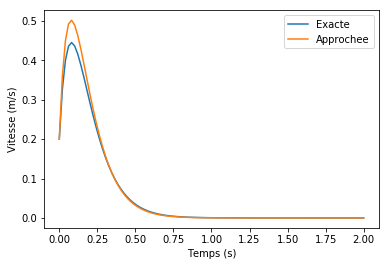

In [10]:
def analytique_gconst(v_0,m,alpha,g_0,temps) :
    v = (m*g_0/alpha) * (1-np.exp(-temps*(alpha/m))) + v_0 * np.exp(-temps*(alpha/m))
    return v

def analytique_gnonconst(v_0,m,alpha,g_0,temps) :
    v = (g_0 * temps + v_0) * np.exp(-temps*(alpha/m))
    return v

#### A  noter : On peut aussi créer une unique fonction g = g0 + g1 exp(...) avec deux parametres g0 et g1 qui sont nuls 
#### selon la situation

def gravity(g_0, temps, m, alpha, param) :
    g = np.zeros(len(temps)) # Initialisation du vecteur gravité
    
    if (param == 'nonconstante') :
        for nt in range(len(temps)) :
            g[nt] = g_0 * np.exp(-(alpha/m)*temps[nt]) 
    else :
        for nt in range(len(temps)) :
            g[nt] = g_0
            
    return g
    
def EulerExp_v(v_0, m, alpha, g_0, param, temps) :
    v = np.zeros(len(temps)) # Initialisation du vecteur vitesse
    v[0] = v_0 # Affectation de la condition initiale 
    
    g = gravity(g_0,temps,m,alpha,param)
    
    for nt in range(len(temps)-1):
        idt = temps[nt+1]-temps[nt]# Pas de temps
        v[nt+1] = v[nt]+idt*(g[nt]-(v[nt]*alpha/m))
    return v

# Declaration des variables : Vous pouvez choisir de conserver un système d'unité différent et des valeurs différentes

v_0 = 0.2 # [m/s]
m = 1. # [kg] 
alpha = 10. # [kg/m] 
g_0 = 9.88 # [m/s^2]
param = 'nonconstante'

temps = np.linspace(0., 2., 100)

v_exacte_gconstante = analytique_gconst(v_0,m,alpha,g_0,temps)
v_exacte = analytique_gnonconst(v_0,m,alpha,g_0,temps)
v_approchee = EulerExp_v(v_0, m, alpha, g_0, param, temps)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(temps, v_exacte, label='Exacte')
ax.plot(temps, v_approchee, label='Approchee')
# Ajout du nom des axes
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Vitesse (m/s)')
ax.legend()

### Question 6 : Méthode implicite

La méthode d'Euler implicite consiste à chercher la valeur approchée de la solution à l'instant $t_{i+1}$, et non plus à l'instant $t_i$ comme pour la méthode explicite, avec la relation suivante :

$$
y_{i+1} = y_i + \Delta t f(t_{i+1}, y_{i+1}), \quad i\in [0, n-1].
$$

où $n$ correspond toujours à la taille du tableau discrétisé en temps. Dans le cas où l'on supprime complètement la force de gravité, quelle est la forme de la fonction f ?

$$
f(t_{i+1}, v_{i+1}) = - v_{i+1} \frac{\alpha}{m}
$$

Cette méthode implicite présente certains avantages (stabilité) et inconvénients (temps de calcul) (voir Cours, TD). En particulier, il est nécessaire de résoudre, à chaque pas de temps, une nouvelle équation. Cependant, comme vous l'avez vu, ce cas particulier est un des rares cas où la résolution de ce schéma implicite peut se faire, paradoxalement, explicitement. On obtient :

$$
v_n = \frac{v_0}{\left(1 + \frac{\alpha}{m} \Delta t \right)^n}
$$

Obtenez numériquement cette solution, à comparer avec la solution analytique sans second membre. Evaluez l'impact du pas de temps sur la résolution. Evaluez également l'impact du facteur $\frac{\alpha}{m}$.

Text(0, 0.5, 'Vitesse (m/s)')

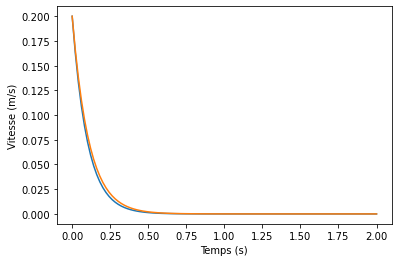

In [46]:
def EulerImp_v(v_0, m, alpha, g_0, param, temps) :
    v = np.zeros(len(temps)) # Initialisation du vecteur vitesse
    v[0] = v_0 # Affectation de la condition initiale 
    
    g = gravity(g_0,temps,m,alpha,param)
    
    for nt in range(len(temps)):
        idt = temps[nt]-temps[nt-1]# Pas de temps
        v[nt] = v[0]/((1+(alpha*idt/m))**nt)
    return v

# Declaration des variables : Vous pouvez choisir de conserver un système d'unité différent et des valeurs différentes

v_0 = 0.2 # [m/s]
m = 1. # [kg] 
alpha = 10. # [kg/m] 
g_0 = 0. # [m/s^2]
param = 'constante'

temps = np.linspace(0., 2., 100)

v_exacte_gnulle = analytique_gconst(v_0,m,alpha,g_0,temps)
v_approchee = EulerImp_v(v_0, m, alpha, g_0, param, temps)

fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(temps, v_exacte_gnulle)
ax.plot(temps, v_approchee)
# Ajout du nom des axes
ax.set_xlabel('Temps (s)')
ax.set_ylabel('Vitesse (m/s)')

### Question 7 : Comparaison

Qu'apporte, selon vous, la résolution implicite ? Comment auriez-vous procédé pour la résolution implicite dans le cas où un second membre dépendant du temps était présent ?